Column name =  DS18B20


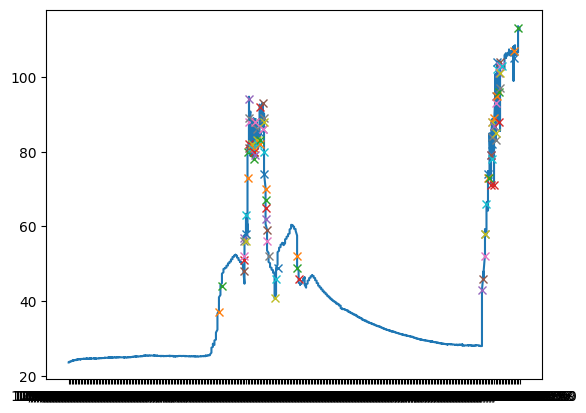

Column name =  DHT11


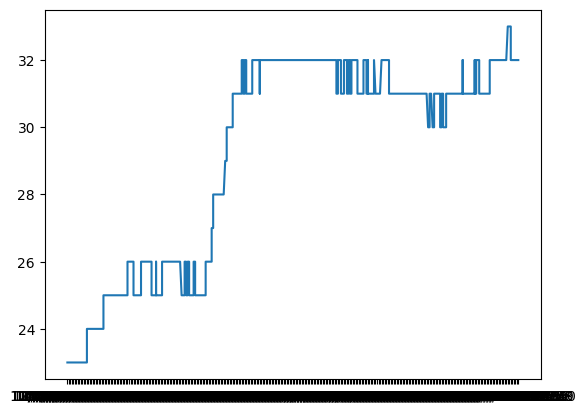

Column name =  LM35DZ


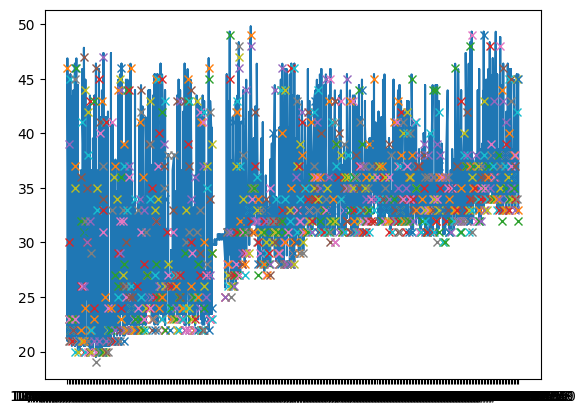

Column name =  BMP180


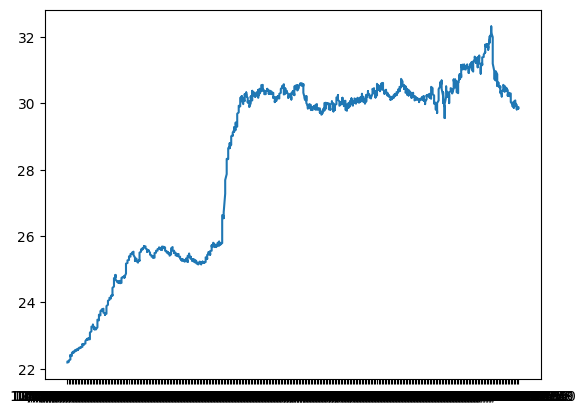

Column name =  Thermistor


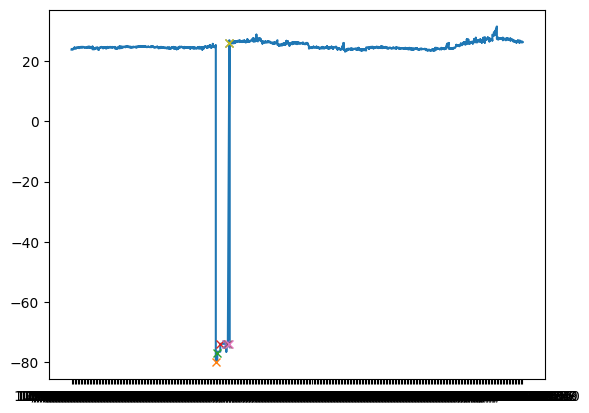

Column name =  DHT22


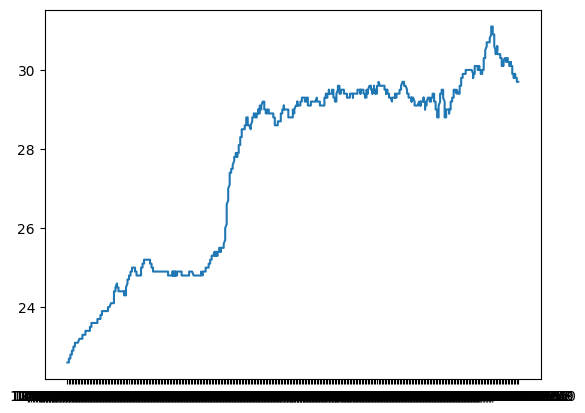

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 

def anomaly_detection(data_list,column,timestamps, threshold, drift):
    s = [0]
    g_plus = [0]
    g_minus = [0]
    t_abnormal = []
    fd = open("./csvs/"+column+"_python_data.csv", "w")
    for i in range(1, len(data_list)):
        s.insert(i,data_list[i] - data_list[i-1])
        g_plus.insert(i,max(0, g_plus[i-1] + s[i-1] - drift))
        g_minus.insert(i,max(0, g_minus[i-1] - s[i-1] - drift))
        if g_plus[i] > threshold or g_minus[i] > threshold:
            t_abnormal.append( (timestamps[i] , data_list[i]//100 ) )
            g_plus[i] = 0
            g_minus[i] = 0
            line_str = str(i) + ", 1\n"
            fd.write(line_str)
        else:
            line_str = str(i) + ", 0\n"
            fd.write(line_str)

    return t_abnormal

def read_data(file):
    df = pd.read_csv(file)
    return df

def correct_data(data_list):
    new_data= []
    for i in data_list:
        new_data.append(i *100)
    return new_data



df = read_data('04-12-22_temperature_measurements.csv')
for l in df.columns:
    if(l!='Timestamp'):
        values = correct_data(df[l])
        print("Column name = " + l)

        plt.plot(df["Timestamp"], df[l])
        found_values = anomaly_detection(values, l, df['Timestamp'], 200 ,50)
        for val in found_values:
            plt.plot(val[0] , val[1],'x')
        


        plt.show()
        


In [ ]:
# Create the six files
import pandas as pd
import matplotlib.pyplot as plt 

df = read_data('04-12-22_temperature_measurements.csv')
get_bin = lambda x, n: format(x, 'b').zfill(n)


for column in df.columns:
    
    if(column != "Timestamp"):
        fd = open("./csvs/"+column+"_good_data.csv", "w")
        print(column)
        new_df = pd.DataFrame()
        for row in df[column]:
            int_row = int(row * 100)
            if int_row < 0:
                value = get_bin((1 << 16) + int_row, 16)
            else:
                value = get_bin(int_row, 16)
            new_df[column] = value
            fd.write(value + "\n")
        fd.close()


 DS18B20
 DHT11
 LM35DZ
 BMP180
 Thermistor
 DHT22
